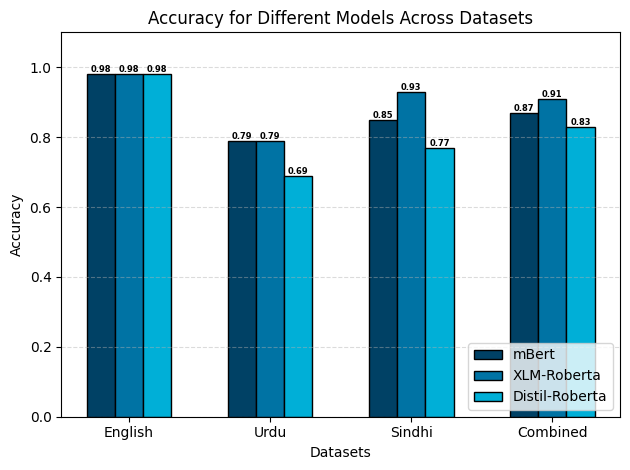

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
datasets = ['English', 'Urdu', 'Sindhi', 'Combined']
models = ['mBert', 'XLM-Roberta', 'Distil-Roberta']

# Accuracy values from the table
accuracy_values = {
    'English': [0.98, 0.98, 0.98],
    'Urdu': [0.79, 0.79, 0.69],
    'Sindhi': [0.85, 0.93, 0.77],
    'Combined': [0.87, 0.91, 0.83]
}

# Plotting
bar_width = 0.2
index = np.arange(len(datasets))

fig, ax = plt.subplots()

# IEEE color theme: subdued colors
colors = ['#004165', '#0073A4', '#00AFD7']  # Dark blue, medium blue, light blue

for i, model in enumerate(models):
    accuracies = [accuracy_values[dataset][i] for dataset in datasets]
    bars = ax.bar(index + i * bar_width, accuracies, bar_width, label=model,
                  color=colors[i], edgecolor='black')
    # Adding the text on top of the bars with a smaller font size
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
                ha='center', va='bottom', color='black', fontweight='bold', fontsize=6)  # Adjusted font size here

ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Different Models Across Datasets')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(datasets)

# Positioning the legend at the bottom right
ax.legend(loc='lower right')

plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.45)
plt.tight_layout()
plt.show()

In [2]:
# F1-Scores data from the table
f1_scores = {
    'mBert': {
        'English': [0.54, 0.97, 0.76, 0.97, 0.98],
        'Urdu': [0.03, 0.64, 0.23, 0.64, 0.84],
        'Sindhi': [0.26, 0.85, 0.50, 0.87, 0.91],
        'All': [0.20, 0.82, 0.52, 0.83, 0.91]
    },
    'XLM-Roberta': {
        'English': [0.57, 0.97, 0.74, 0.97, 0.98],
        'Urdu': [0.05, 0.68, 0.27, 0.61, 0.86],
        'Sindhi': [0.44, 0.92, 0.65, 0.93, 0.93],
        'All': [0.28, 0.84, 0.55, 0.83, 0.92]
    },
    'Distil-Roberta': {
        'English': [0.54, 0.97, 0.75, 0.97, 0.98],
        'Urdu': [0.03, 0.57, 0.09, 0.48, 0.67],
        'Sindhi': [0.12, 0.73, 0.31, 0.75, 0.79],
        'All': [0.10, 0.75, 0.43, 0.74, 0.82]
    }
}

average_scores = {}
for model, languages_scores in f1_scores.items():
    model_scores = []
    for scores in languages_scores.values():
        model_scores.extend(scores)
    average_scores[model] = sum(model_scores) / len(model_scores)

# Determining the best model
best_model = max(average_scores, key=average_scores.get)
best_score = average_scores[best_model]

print(f"The best model is {best_model} with an average F1-score of {best_score:.2f}")

The best model is XLM-Roberta with an average F1-score of 0.70


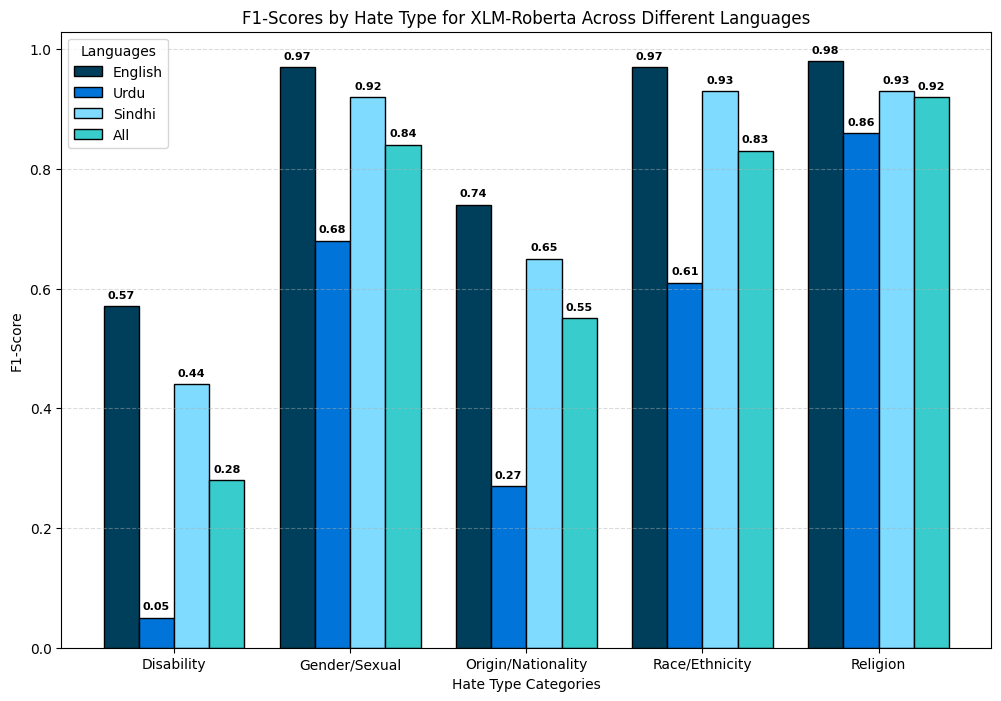

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the best model, assuming XLM-Roberta was the best
best_model_scores = {
    'English': [0.57, 0.97, 0.74, 0.97, 0.98],
    'Urdu': [0.05, 0.68, 0.27, 0.61, 0.86],
    'Sindhi': [0.44, 0.92, 0.65, 0.93, 0.93],
    'All': [0.28, 0.84, 0.55, 0.83, 0.92]
}

categories = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']
languages = ['English', 'Urdu', 'Sindhi', 'All']

# Set up the plotting data
num_categories = len(categories)
x = np.arange(num_categories)  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Shades of blue for each language
colors = ['#003f5c', '#0074D9', '#7FDBFF', '#39CCCC']  # A palette of progressively lighter blues

# Adding bars for each language and adding text on top
for i, lang in enumerate(languages):
    scores = best_model_scores[lang]
    bars = ax.bar(x + i*width, scores, width, label=lang, color=colors[i], edgecolor='black')
    # Adding text on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontweight='bold', color='black', fontsize=8)

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Hate Type Categories')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Scores by Hate Type for XLM-Roberta Across Different Languages')
ax.set_xticks(x + width*(len(languages)-1)/2)
ax.set_xticklabels(categories)
ax.legend(title="Languages")

plt.grid(axis='y', linestyle='--', alpha=0.45)
plt.show()